# Testing Baraffe isochrone generation after installing expanded model
## No isochrone grid generated, nor interfacing with nbody6 data

In [1]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [2]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.Baraffe15()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F115W', 'jwst,F182M']
filters = ['m_jwst_F115W', 'm_jwst_F182M']
iso_dir = 'isochrones/'
metallicity = 0
log_age = np.log10(1e6)

In [7]:
my_iso = synthetic.IsochronePhot(log_age, AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)

Isochrone generation took 1.592598 s.
Making photometry for isochrone: log(t) = 6.00  AKs = 0.00  dist = 410
     Starting at:  2024-03-02 03:51:51.590406   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2344 K  m_jwst_F115W = 17.72
Starting filter: jwst,F182M   Elapsed time: 0.53 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2344 K  m_jwst_F182M = 16.97
      Time taken: 1.06 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


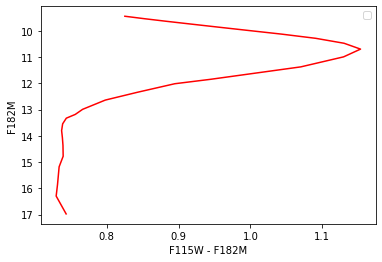

In [8]:
# plot isochrone curve
py.plot(my_iso.points[filters[0]] - my_iso.points[filters[1]], 
           my_iso.points[filters[1]], 'red')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()

In [12]:
print("Minimum mass: " + str(min(my_iso.points['mass'])))
print("Maximum mass: " + str(max(my_iso.points['mass'])))

Minimum mass: 0.01
Maximum mass: 1.4


Note to self: to switch back to original mass range (if needed), rename directories in spisea models/baraffe/iso/